#**Stroke Survival Prediction**
## Will the patient live or die within 6 months?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Data fetching

In [9]:
# Importing the data
stroke_trials_df = pd.read_csv("/content/V2_International_Stroke_Trials.xlsx - 1745-6215-12-101-S1 - Sheet1 (1).csv")
stroke_trials_df.head()

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RSBP,RCONSC,RDEF1,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,M,69,Y,C,Y,Y,C,140,D,N,...,0,0,0,0,0,0,0,0,0,0
1,M,76,Y,C,Y,N,C,150,F,Y,...,0,0,0,0,0,0,0,0,0,0
2,F,71,N,C,Y,N,C,170,F,Y,...,0,0,0,0,0,0,0,0,0,0
3,M,81,N,C,N,N,C,170,F,N,...,0,0,0,0,0,0,0,0,0,0
4,M,78,N,C,N,N,C,170,F,Y,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# how many missing values on each column
stroke_trials_df.isna().sum()

,0
SEX,0
AGE,0
RSLEEP,0
RATRIAL,0
RCT,0
...,...
HTI14,0
PE14,0
DVT14,0
TRAN14,0


# Data Exploration
 1. using statical methods.
 2. checking the correlated features.


In [11]:
# printing the data type
stroke_trials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19435 entries, 0 to 19434
Data columns (total 77 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19435 non-null  object 
 1   AGE       19435 non-null  int64  
 2   RSLEEP    19435 non-null  object 
 3   RATRIAL   19435 non-null  object 
 4   RCT       19435 non-null  object 
 5   RVISINF   19435 non-null  object 
 6   RHEP24    19435 non-null  object 
 7   RSBP      19435 non-null  int64  
 8   RCONSC    19435 non-null  object 
 9   RDEF1     19435 non-null  object 
 10  RDEF2     19435 non-null  object 
 11  RDEF3     19435 non-null  object 
 12  RDEF4     19435 non-null  object 
 13  RDEF5     19435 non-null  object 
 14  RDEF6     19435 non-null  object 
 15  RDEF7     19435 non-null  object 
 16  RDEF8     19435 non-null  object 
 17  STYPE     19435 non-null  object 
 18  RDATE     19435 non-null  object 
 19  RXASP     19435 non-null  object 
 20  RXHEP     19435 non-null  ob

In [12]:
# Printing columns names
print(stroke_trials_df.columns)

Index(['SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RSBP',
       'RCONSC', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7',
       'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT',
       'DLH14', 'DMH14', 'DHH14', 'ONDRUG', 'DSCH', 'DIVH', 'DAP', 'DOAC',
       'DGORM', 'DSTER', 'DCAA', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DDIAGISC',
       'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE',
       'DALIVE', 'DPLACE', 'DDEAD', 'DDEADC', 'FPLACE', 'FAP', 'FOAC',
       'COUNTRY', 'CNTRYNUM', 'EXPDD', 'EXPD6', 'EXPD14', 'SET14D', 'ID14',
       'OCCODE', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7',
       'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14',
       'TRAN14', 'NCB14'],
      dtype='object')


In [13]:
# print each column unique values
for col in stroke_trials_df.columns:
  print(f'Unique values in {col}: {stroke_trials_df[col].unique()}')

Unique values in SEX: ['M' 'F']
Unique values in AGE: [69 76 71 81 78 54 77 23 47 48 45 83 86 50 68 64 63 66 74 56 87 84 43 57
 70 79 65 85 75 53 59 67 80 62 88 60 72 82 73 51 55 52 90 61 32 49 39 46
 58 44 33 40 91 89 93 92 30 41 34 95 37 36 35 99 38 42 96 19 94 29 28 27
 98 97 20 25 26 31 22 24 16 21]
Unique values in RSLEEP: ['Y' 'N']
Unique values in RATRIAL: ['C' 'Y' 'N']
Unique values in RCT: ['Y' 'N']
Unique values in RVISINF: ['Y' 'N']
Unique values in RHEP24: ['C' 'N' 'Y']
Unique values in RSBP: [140 150 170 135 120 174 130 190 180 160 110 118 210 200 145 155 220 240
 165 169 158 186 230 175 194 168 153 142 132  90 195 134 100 148 205  95
 204 128 163 202 136 108 101 124 185 154 126 147 221 105 188 178 176 138
 125 115 193 156 164 199 182 215 159 172 203 162 122 212 143 117 144 184
 152 250 192  80 196 116 113 146 225 157 270 107 123 167 245  96 177 119
 244 197 151 137 211 222  86 102  70 235 187 129 189  98 207 114 224  93
 127  85 208 161 229 206 260 103 218 280 173 139 166

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Statical summary of the dataset using describe function.
stroke_trials_df.describe(include='all')

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RSBP,RCONSC,RDEF1,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
count,19435,19435.000000,19435,19435,19435,19435,19435,19435.000000,19435,19435,...,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000
unique,2,NaN,2,3,2,2,3,NaN,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,N,N,Y,N,N,NaN,F,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10407,NaN,13750,15282,13024,13020,18655,NaN,14921,14099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,71.715410,NaN,NaN,NaN,NaN,NaN,160.159197,NaN,NaN,...,0.011834,0.008284,0.020324,0.013378,0.041523,0.003036,0.006895,0.001132,0.008541,0.027322
std,NaN,11.619714,NaN,NaN,NaN,NaN,NaN,27.610382,NaN,NaN,...,0.108143,0.090641,0.141110,0.114890,0.199502,0.055015,0.082750,0.033627,0.092026,0.163024
min,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,160.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,180.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Data cleaning
 1. Handel missing values.
 2. Handle dublicates rows.
 3. droping columns.

In [16]:
# Find the number of na values in each column
for col in stroke_trials_df.columns:
  x= stroke_trials_df[col].isna().sum()
print(f'{col}: {x}')

NCB14: 0


In [17]:
# how many missing values on each column
stroke_trials_df.isna().sum()

,0
SEX,0
AGE,0
RSLEEP,0
RATRIAL,0
RCT,0
...,...
HTI14,0
PE14,0
DVT14,0
TRAN14,0


# Data Transformation
1. Encode categorical variable.
2. scale Numerical features.

In [18]:
# Define a mapping function

def transform_values(x):
    return 1 if x == 'Y' else 0 if x == 'N' else -1

# Apply mapping to specific columns
columns_to_transform = ['RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24',
        'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7',
       'RDEF8','RXASP', 'DASP14', 'DASPLT','DLH14', 'DMH14', 'DHH14', 'DSCH',
      'DIVH', 'DAP', 'DOAC','DGORM', 'DSTER', 'DCAA', 'DCAREND', 'DTHROMB', 'DMAJNCH' ]
stroke_trials_df[columns_to_transform] = stroke_trials_df[columns_to_transform].applymap(transform_values)

stroke_trials_df.head()

<ipython-input-18-2457827d5a20>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stroke_trials_df[columns_to_transform] = stroke_trials_df[columns_to_transform].applymap(transform_values)


,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RSBP,RCONSC,RDEF1,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,M,69,1,-1,1,1,-1,140,D,0,...,0,0,0,0,0,0,0,0,0,0
1,M,76,1,-1,1,0,-1,150,F,1,...,0,0,0,0,0,0,0,0,0,0
2,F,71,0,-1,1,0,-1,170,F,1,...,0,0,0,0,0,0,0,0,0,0
3,M,81,0,-1,0,0,-1,170,F,0,...,0,0,0,0,0,0,0,0,0,0
4,M,78,0,-1,0,0,-1,170,F,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# creating new column that shows all types of strokes(Initial Stroke diagnosis)
stroke_trials_df['Initial_Stroke_diagnosis'] = stroke_trials_df[['DDIAGISC', 'DDIAGHA', 'DDIAGUN']].apply(lambda x: 'Y' if 'Y' in x.values else 'N', axis=1)
print(stroke_trials_df['Initial_Stroke_diagnosis'].value_counts())

Initial_Stroke_diagnosis
Y    18989
N      446
Name: count, dtype: int64


In [20]:
# creating new column that shows all types of strokes (Stroke within 14 days)
stroke_trials_df['stroke_within_14days'] = stroke_trials_df[['DRSISC', 'DRSH', 'DRSUNK']].apply(lambda x: 'Y' if 'Y' in x.values else 'N', axis=1)
print(stroke_trials_df['stroke_within_14days'].value_counts())

stroke_within_14days
N    18670
Y      765
Name: count, dtype: int64


In [21]:
# convert features to numerical data using get dummies
stroke_trials_df['Initial_Stroke_diagnosis'] = pd.get_dummies(stroke_trials_df['Initial_Stroke_diagnosis'], drop_first=True, dtype='int')
stroke_trials_df['stroke_within_14days'] = pd.get_dummies(stroke_trials_df['stroke_within_14days'], drop_first=True, dtype='int')
print(stroke_trials_df['Initial_Stroke_diagnosis'].value_counts())
print(stroke_trials_df['stroke_within_14days'].value_counts())

Initial_Stroke_diagnosis
1    18989
0      446
Name: count, dtype: int64
stroke_within_14days
0    18670
1      765
Name: count, dtype: int64


In [22]:
# creating new column that shows patients case after 6 months # if one or more of these column's values is 1 the result IS 1 else result is 0, columns= [ 'DEAD1', 'DEAD2', 'DEAD3' ]
stroke_trials_df['case_after_6months'] = stroke_trials_df[['DEAD1', 'DEAD2', 'DEAD3']].apply(lambda x: 1 if 1 in x.values else 0, axis=1)
print(stroke_trials_df['case_after_6months'].value_counts())

case_after_6months
0    17339
1     2096
Name: count, dtype: int64


In [23]:
# Droping columns
stroke_trials_df.drop(['DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DRSISC', 'DRSH', 'DRSUNK', 'DEAD1', 'DEAD2', 'DEAD3'], axis=1, inplace=True)

In [24]:
stroke_trials_df.columns

Index(['SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RSBP',
       'RCONSC', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7',
       'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT',
       'DLH14', 'DMH14', 'DHH14', 'ONDRUG', 'DSCH', 'DIVH', 'DAP', 'DOAC',
       'DGORM', 'DSTER', 'DCAA', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DNOSTRK',
       'DPE', 'DALIVE', 'DPLACE', 'DDEAD', 'DDEADC', 'FPLACE', 'FAP', 'FOAC',
       'COUNTRY', 'CNTRYNUM', 'EXPDD', 'EXPD6', 'EXPD14', 'SET14D', 'ID14',
       'OCCODE', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14',
       'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14',
       'Initial_Stroke_diagnosis', 'stroke_within_14days',
       'case_after_6months'],
      dtype='object')

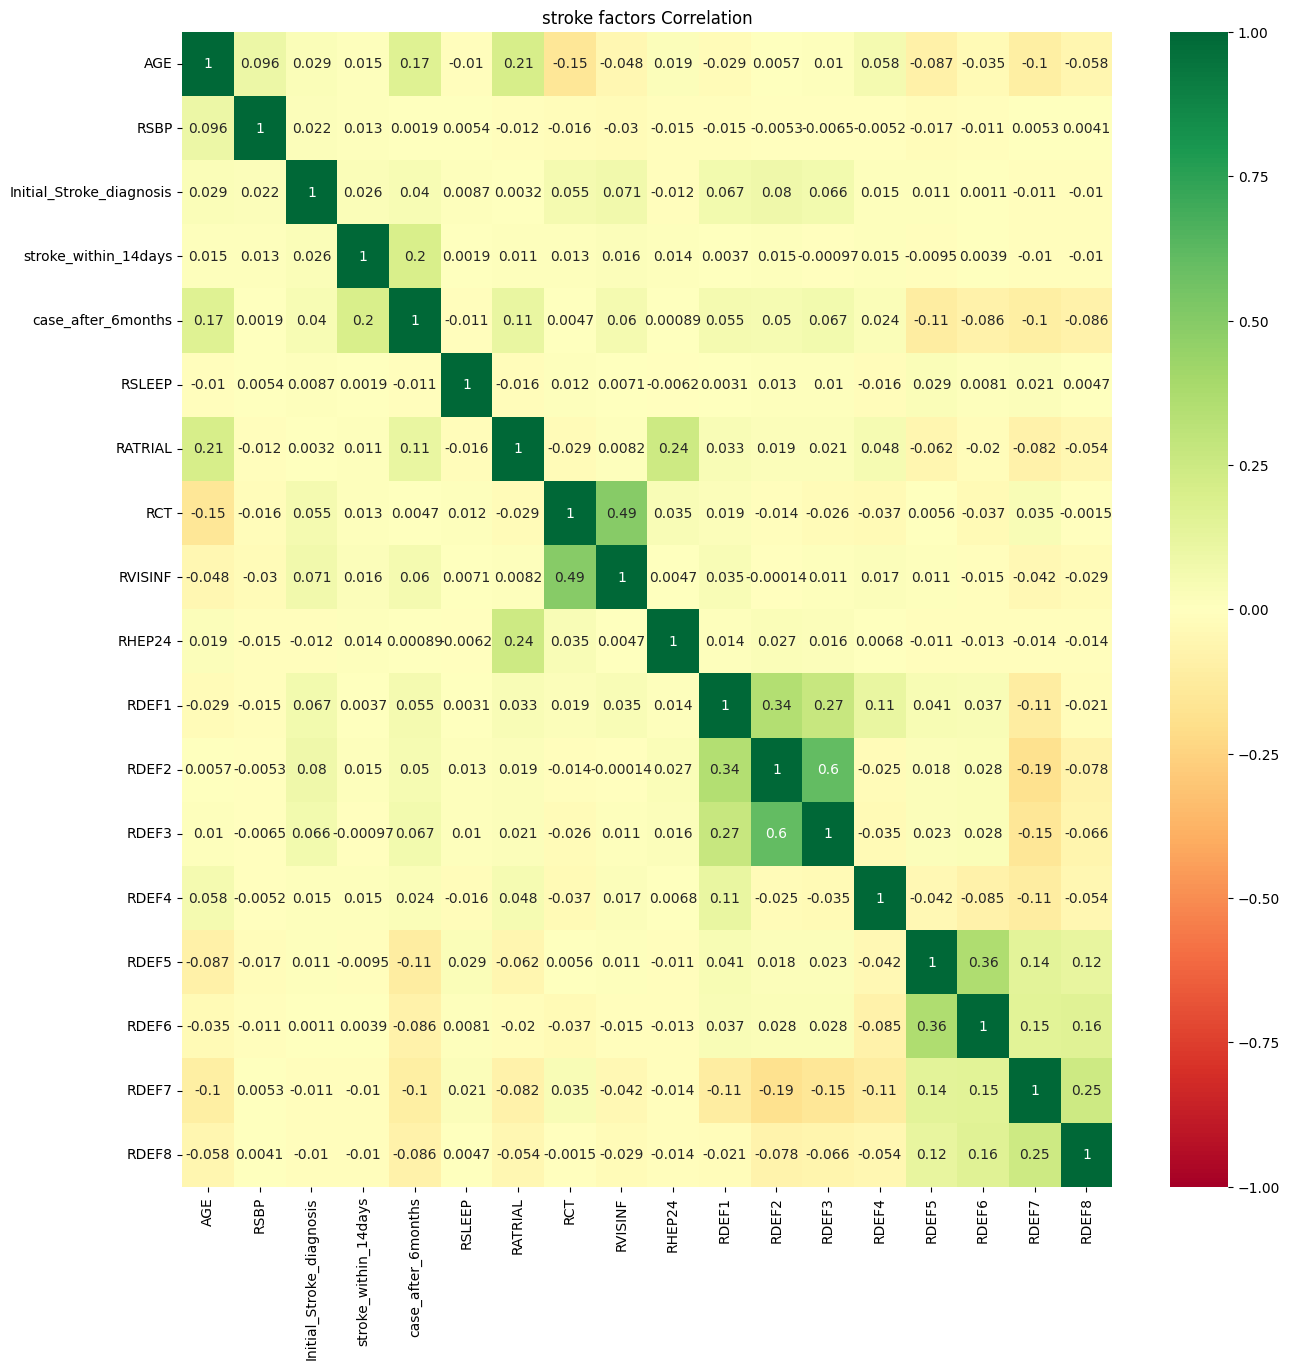

In [27]:
# checking if there is correlation between columns intial data and pasient case after 14 days , 6 months
corr_stroke_factors1= stroke_trials_df[['AGE', 'RSBP','Initial_Stroke_diagnosis', 'stroke_within_14days',
                  'case_after_6months','RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24',
        'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7',
       'RDEF8','RXASP']].corr()

fig = plt.figure(figsize = (15,15))
sns.heatmap(corr_stroke_factors1, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('stroke factors Correlation')
plt.show()


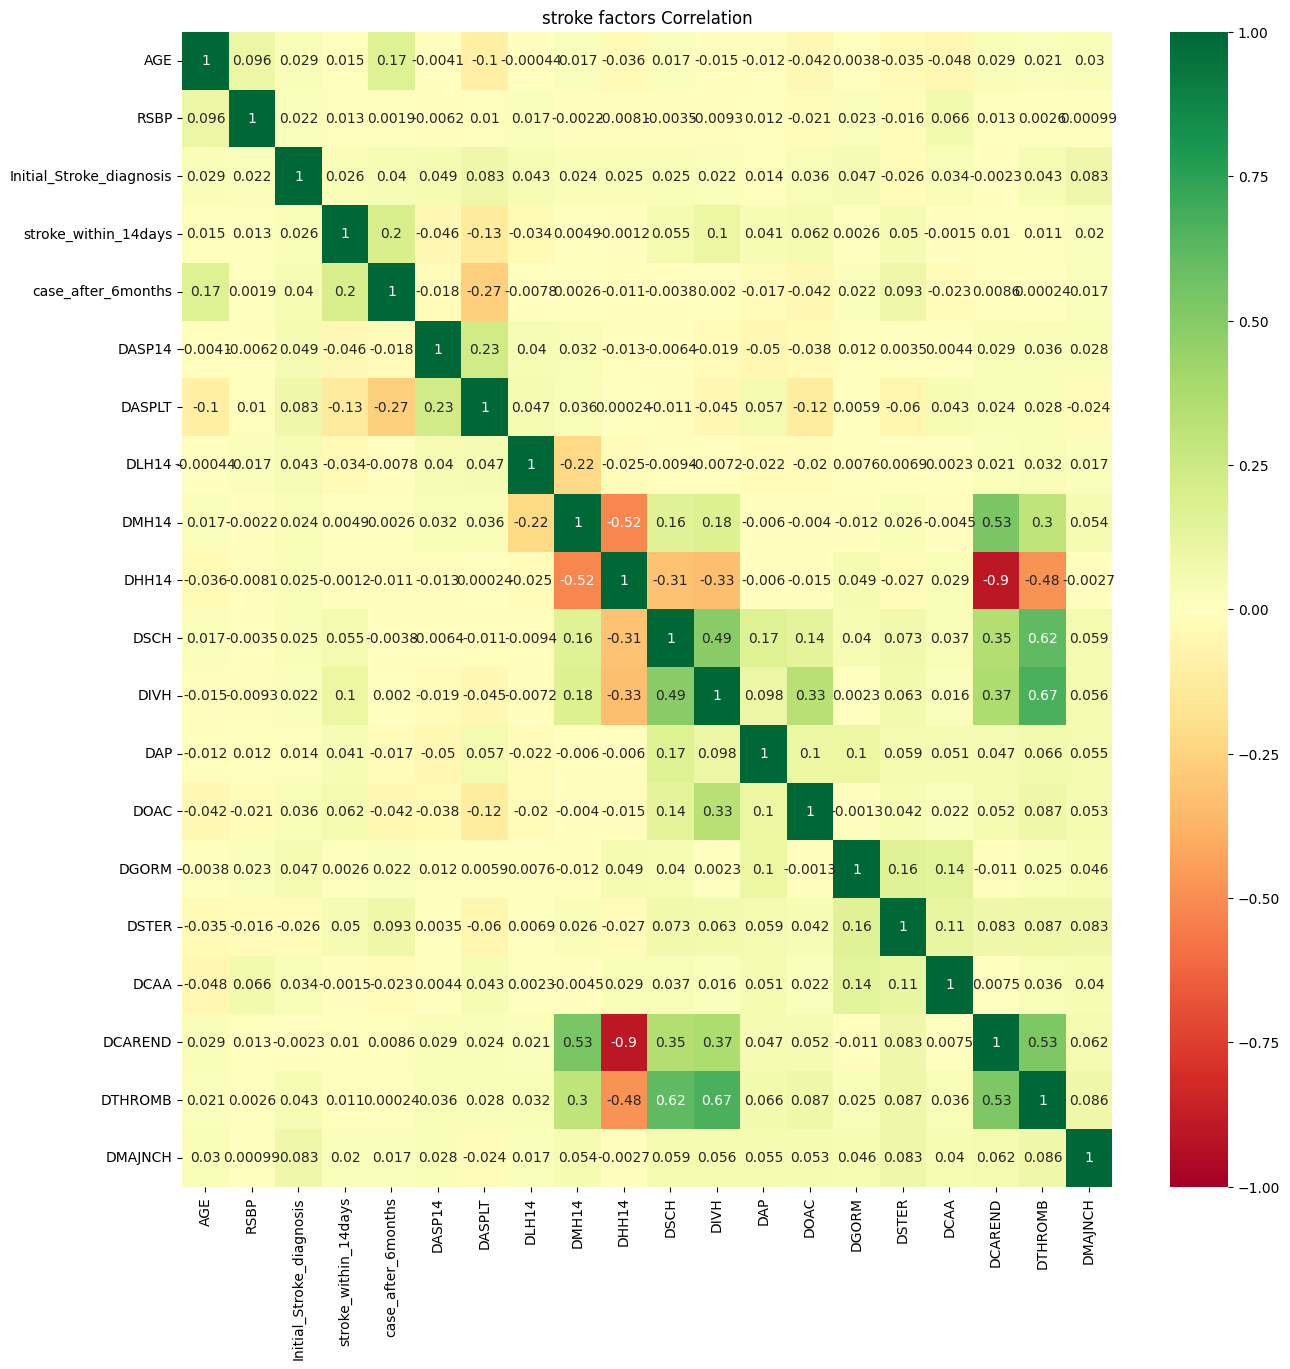

In [30]:
## checking if there is correlation between columns data collected on 14 days and and pasient case after 14 days , 6 months
corr_stroke_factors2= stroke_trials_df[['AGE', 'RSBP','Initial_Stroke_diagnosis', 'stroke_within_14days',
                  'case_after_6months', 'DASP14', 'DASPLT','DLH14', 'DMH14', 'DHH14', 'DSCH',
      'DIVH', 'DAP', 'DOAC','DGORM', 'DSTER', 'DCAA', 'DCAREND', 'DTHROMB', 'DMAJNCH']].corr()

fig2 = plt.figure(figsize = (15,15))
sns.heatmap(corr_stroke_factors2, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('stroke factors Correlation')
plt.show()

# Data spliting

#Data analysis

##Model training and testing
  

1. Choosing the right Machine Learning Algorithm (supervised or unsupervised)
2. Defining the model.
3. Training the model.
4. making prediction
5. Calculate Performance Metrics:
6. plot the result





##Model validation
Using metrics (Confusion Matrix)